In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn as sk
import sklearn.linear_model as slm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ## Higher Version 0.19.1
#from sklearn.cross_validation import train_test_split ## Higher Version 0.16.1

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [13]:
#data = pd.read_csv('housing.csv')
data = pd.read_csv('housing.csv')

In [14]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [15]:
df = data.drop('ocean_proximity', axis = 1)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
df = df.dropna(axis = 0) # remove missing observations
df.info() #check

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
dtypes: float64(9)
memory usage: 1.6 MB


In [18]:
X = df.drop('median_house_value', axis = 1)
y = df['median_house_value'] 

In [19]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20433 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
dtypes: float64(8)
memory usage: 1.4 MB


In [20]:
print(y.shape)

(20433,)


Text(0, 0.5, 'House Price')

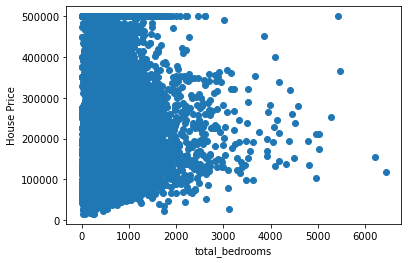

In [21]:
plt.scatter(X['total_bedrooms'], y)
plt.xlabel('total_bedrooms')
plt.ylabel('House Price')

In [14]:
X.head()

<AxesSubplot:>

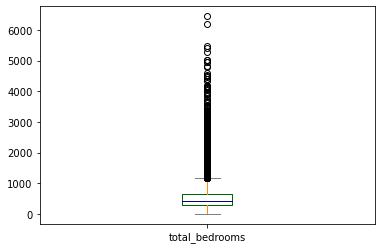

In [22]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',medians='DarkBlue', caps='Gray')
X['total_bedrooms'].plot.box(color=color)

In [23]:
LR = slm.LinearRegression()
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.25)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(15324, 8)
(15324,)
(5109, 8)
(5109,)


In [24]:
LR.fit(X_train, Y_train)

LinearRegression()

In [25]:
predict = LR.predict(X_test)

In [37]:
LR.coef_ESL 3.2; ISLR 3; PML 8.1

array([-4.32129322e+04, -4.28463981e+04,  1.16190991e+03, -7.58836039e+00,
        1.07263411e+02, -3.70135744e+01,  4.75593132e+01,  3.99922627e+04])

In [26]:
print('Predicted Value :',predict[0])
print('Actual Value :',Y_test.values[0])

Predicted Value : 413499.99734686874
Actual Value : 430200.0


In [32]:
LR.score(X_test, Y_test) #R^2

0.6351168854932498

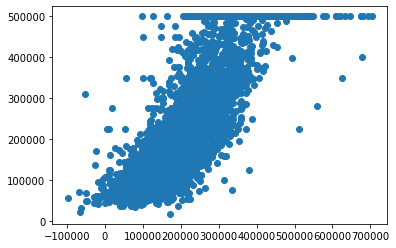

In [30]:
gr = pd.DataFrame({'Predicted':predict,'Actual':Y_test})
gr = gr.reset_index()
gr = gr.drop(['index'],axis=1)
plt.scatter(gr.Predicted, gr.Actual)
#plt.legend(['Actual','Predicted'])
#gr.plot.bar();

In [31]:
#For R-style diagnostic plots, see:
#https://robert-alvarez.github.io/2018-06-04-diagnostic_plots/